<a href="https://colab.research.google.com/github/manvendra7/datascience/blob/master/data_analysis_and_feature_engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd #importing pandas for data analysis
import numpy as np  #importing numpy for numeric python
import matplotlib.pyplot as plt  #importing matplotlib for visualization

In [0]:
from google.colab import files
uploaded = files.upload()               #uploading data from local system

Saving train.csv to train (2).csv


In [0]:
house_price = pd.read_csv('train (2).csv')   #storing data in house_price variable

In [0]:
house_price.head()  #checking the head of dataset

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [0]:
house_price.shape  #checking the shape of the dataset

(1460, 81)

In [0]:
house_price.columns   #checking the column names of the dataset

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [0]:
house_price.info()   #checking the information about all the attributes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [0]:
house_price['SalePrice'].describe() #statstical summary of dependent variable

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

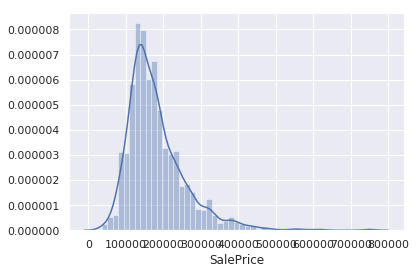

In [0]:
import seaborn as sns  #importing seaborn for visualization
sns.distplot(house_price['SalePrice']);      #

In [0]:
print('Skewness: %f' %house_price['SalePrice'].skew())
print('Kurtosis: %f' %house_price['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


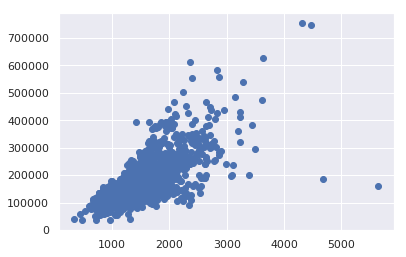

In [0]:
#scatterplot GrLivArea/SalePrice
plt.scatter(x=house_price['GrLivArea'],y=house_price['SalePrice'])

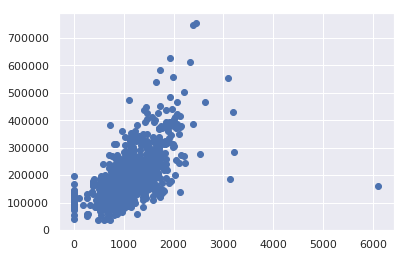

In [0]:
#scatterplot TotalBsmtSf/SalePrice
plt.scatter(x=house_price['TotalBsmtSF'],y=house_price['SalePrice'])

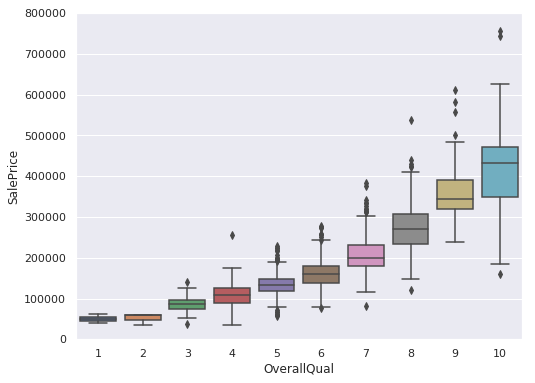

In [0]:
#scatterplot OverallQuall/SalePrice
f, ax = plt.subplots(figsize=(8, 6))
fig=sns.boxplot(x=house_price['OverallQual'],y=house_price['SalePrice'])
fig.axis(ymin=0,ymax=800000);

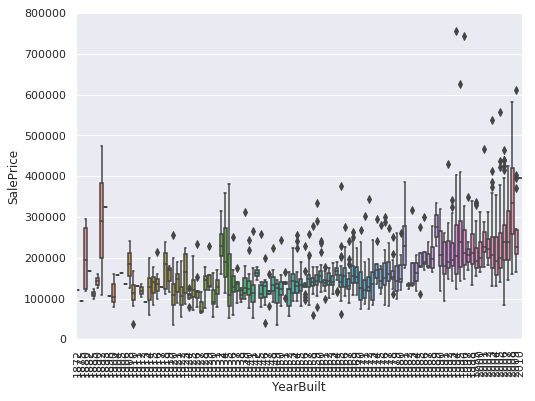

In [0]:
#scatterplot YearBuilt/SalePrice
f, ax = plt.subplots(figsize=(8, 6))
fig=sns.boxplot(x=house_price['YearBuilt'],y=house_price['SalePrice'])
fig.axis(ymin=0,ymax=800000);
plt.xticks(rotation=90);

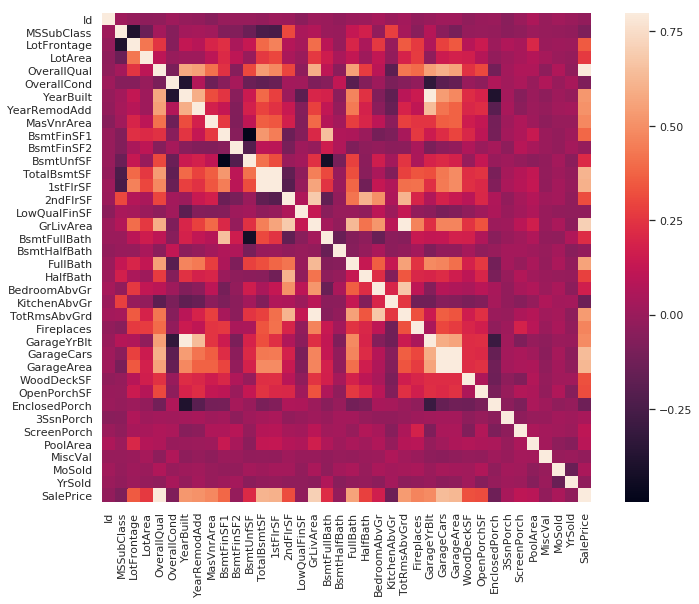

In [0]:
#correlation matrix
corrmat =house_price.corr()
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat,vmax=.8,square=True);

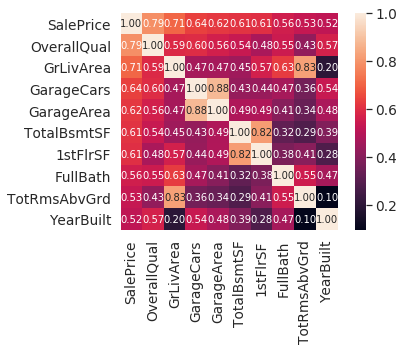

In [0]:
#saleprice correlation
k=10
cols=corrmat.nlargest(k,'SalePrice')['SalePrice'].index
cm=np.corrcoef(house_price[cols].values.T)
sns.set(font_scale=1.25)
hm= sns.heatmap(cm,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size':10},yticklabels=cols.values,xticklabels=cols.values)
plt.show()

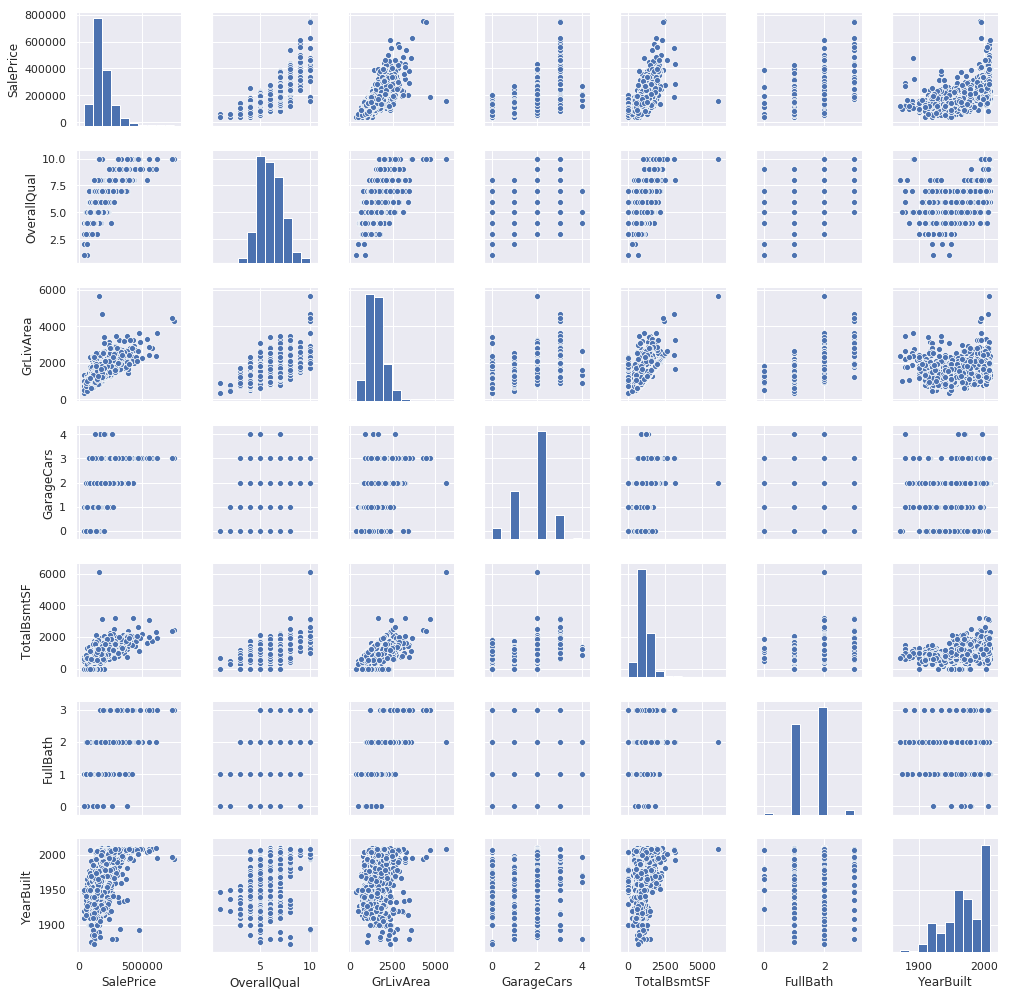

In [0]:
#scatterplot
sns.set()
cols=['SalePrice','OverallQual','GrLivArea','GarageCars','TotalBsmtSF','FullBath','YearBuilt']
sns.pairplot(house_price[cols],height=2.0)
plt.show()

In [0]:
#missing data
total = house_price.isnull().sum()
total

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

In [0]:
total=total.sort_values(ascending=False)
total

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
LotFrontage       259
GarageCond         81
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageQual         81
BsmtExposure       38
BsmtFinType2       38
BsmtFinType1       37
BsmtCond           37
BsmtQual           37
MasVnrArea          8
MasVnrType          8
Electrical          1
Utilities           0
YearRemodAdd        0
MSSubClass          0
Foundation          0
ExterCond           0
ExterQual           0
Exterior2nd         0
Exterior1st         0
RoofMatl            0
RoofStyle           0
YearBuilt           0
                 ... 
GarageArea          0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
3SsnPorch           0
BsmtUnfSF           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
Functional          0
TotRmsAbvGrd        0
KitchenQua

In [0]:
house_price.isnull().count().sort_values(ascending=False)

SalePrice       1460
Heating         1460
RoofStyle       1460
RoofMatl        1460
Exterior1st     1460
Exterior2nd     1460
MasVnrType      1460
MasVnrArea      1460
ExterQual       1460
ExterCond       1460
Foundation      1460
BsmtQual        1460
BsmtCond        1460
BsmtExposure    1460
BsmtFinType1    1460
BsmtFinSF1      1460
BsmtFinType2    1460
BsmtFinSF2      1460
BsmtUnfSF       1460
YearRemodAdd    1460
YearBuilt       1460
OverallCond     1460
LandContour     1460
MSSubClass      1460
MSZoning        1460
LotFrontage     1460
LotArea         1460
Street          1460
Alley           1460
LotShape        1460
                ... 
ScreenPorch     1460
PoolArea        1460
PoolQC          1460
Fence           1460
MiscFeature     1460
MiscVal         1460
MoSold          1460
YrSold          1460
SaleType        1460
GarageCars      1460
GarageFinish    1460
GarageYrBlt     1460
FullBath        1460
Electrical      1460
1stFlrSF        1460
2ndFlrSF        1460
LowQualFinSF 

In [0]:
percent = (house_price.isnull().sum()/house_price.isnull().count().sort_values(ascending=False))
percent

1stFlrSF         0.000000
2ndFlrSF         0.000000
3SsnPorch        0.000000
Alley            0.937671
BedroomAbvGr     0.000000
BldgType         0.000000
BsmtCond         0.025342
BsmtExposure     0.026027
BsmtFinSF1       0.000000
BsmtFinSF2       0.000000
BsmtFinType1     0.025342
BsmtFinType2     0.026027
BsmtFullBath     0.000000
BsmtHalfBath     0.000000
BsmtQual         0.025342
BsmtUnfSF        0.000000
CentralAir       0.000000
Condition1       0.000000
Condition2       0.000000
Electrical       0.000685
EnclosedPorch    0.000000
ExterCond        0.000000
ExterQual        0.000000
Exterior1st      0.000000
Exterior2nd      0.000000
Fence            0.807534
FireplaceQu      0.472603
Fireplaces       0.000000
Foundation       0.000000
FullBath         0.000000
                   ...   
LotShape         0.000000
LowQualFinSF     0.000000
MSSubClass       0.000000
MSZoning         0.000000
MasVnrArea       0.005479
MasVnrType       0.005479
MiscFeature      0.963014
MiscVal     

In [0]:
missing_data = pd.concat([total,percent],axis=1, keys=['total','percent'],sort=False)
missing_data

,total,percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [0]:
#dealing with the missing data
house_price=house_price.drop((missing_data[missing_data['total']>1]).index,1)


In [0]:
house_price=house_price.drop(house_price.loc[house_price['Electrical'].isnull()].index)
house_price.isnull().sum().max()

0

In [0]:
#standardizing data
from sklearn.preprocessing import StandardScaler
saleprice_scaled = StandardScaler().fit_transform(house_price['SalePrice'][:,np.newaxis])
saleprice_scaled

array([[ 0.34704187],
       [ 0.0071701 ],
       [ 0.53585953],
       ...,
       [ 1.07713679],
       [-0.48847623],
       [-0.42081658]])

In [0]:
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
print('outer range low of distribution:')
print(low_range)

outer range low of distribution:
[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]


In [0]:
high_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('\nouter range high of distribution:')
print(high_range)


outer range high of distribution:
[[3.82758058]
 [4.0395221 ]
 [4.49473628]
 [4.70872962]
 [4.728631  ]
 [5.06034585]
 [5.42191907]
 [5.58987866]
 [7.10041987]
 [7.22629831]]


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


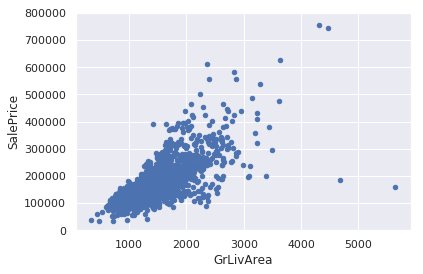

In [0]:
#bivariate analysis
var='GrLivArea'
data= pd.concat([house_price['SalePrice'],house_price[var]],axis=1)
data.plot.scatter(x=var,y='SalePrice',ylim=(0,800000));

In [0]:
#deleting points
house_price.sort_values(by='GrLivArea',ascending=False)[:2]

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,63887,Pave,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Ex,TA,PConc,5644,0,466,6110,GasA,Ex,Y,SBrkr,4692,950,0,5642,2,0,2,1,3,1,Ex,12,Typ,3,2,1418,Y,214,292,0,0,0,480,0,1,2008,New,Partial,160000
523,524,60,RL,40094,Pave,IR1,Bnk,AllPub,Inside,Gtl,Edwards,PosN,PosN,1Fam,2Story,10,5,2007,2008,Hip,CompShg,CemntBd,CmentBd,Ex,TA,PConc,2260,0,878,3138,GasA,Ex,Y,SBrkr,3138,1538,0,4676,1,0,3,1,3,1,Ex,11,Typ,1,3,884,Y,208,406,0,0,0,0,0,10,2007,New,Partial,184750


In [0]:
house_price= house_price.drop(house_price[house_price['Id']==1299].index)
house_price= house_price.drop(house_price[house_price['Id']==524].index)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


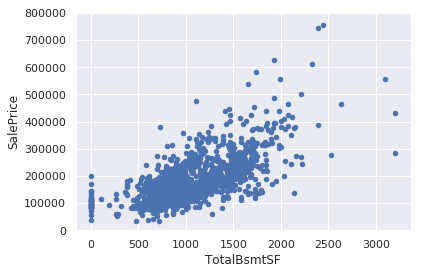

In [0]:
#bivariate analysis saleprice/grlivarea
var='TotalBsmtSF'
data=pd.concat([house_price['SalePrice'],house_price[var]],axis=1)
data.plot.scatter(x=var,y='SalePrice',ylim=(0,800000));

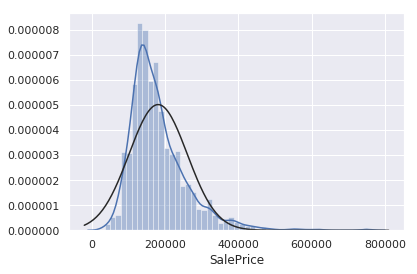

In [0]:
#histogram and normal probability plot
from scipy.stats import norm
from scipy import stats
sns.distplot(house_price['SalePrice'], fit=norm);


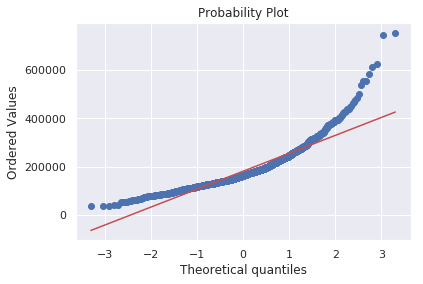

In [0]:
fig=plt.figure()
res=stats.probplot(house_price['SalePrice'], plot=plt)

In [0]:
#applying log transformation
house_price['SalePrice'] = np.log(house_price['SalePrice'])

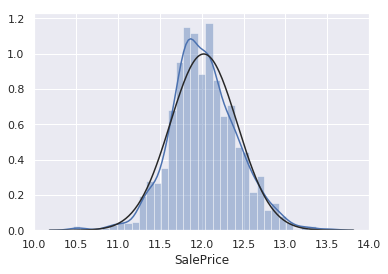

In [0]:
#transformed histogram and normal porbability plot
sns.distplot(house_price['SalePrice'],fit=norm);

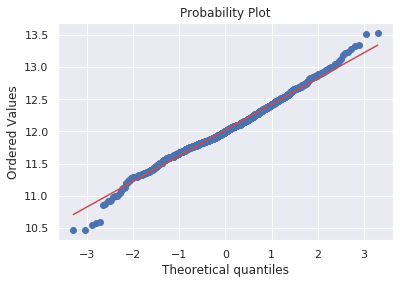

In [0]:
fig=plt.figure()
res=stats.probplot(house_price['SalePrice'],plot=plt)

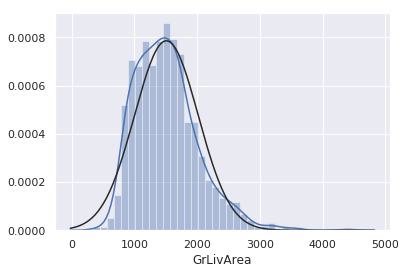

In [0]:
sns.distplot(house_price['GrLivArea'], fit=norm);

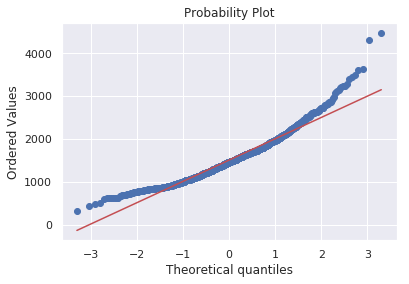

In [0]:
fig=plt.figure()
res= stats.probplot(house_price['GrLivArea'], plot=plt)

In [0]:
#data transformation
house_price['GrLivArea']= np.log(house_price['GrLivArea'])

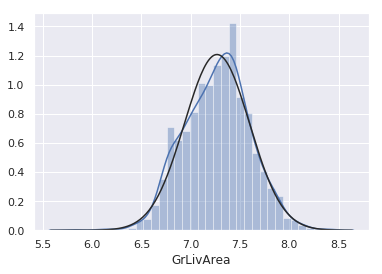

In [0]:
sns.distplot(house_price['GrLivArea'],fit=norm);

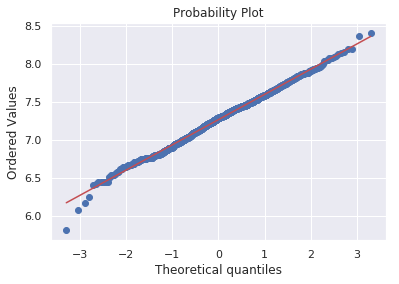

In [0]:
fig=plt.figure()
res= stats.probplot(house_price['GrLivArea'], plot=plt)

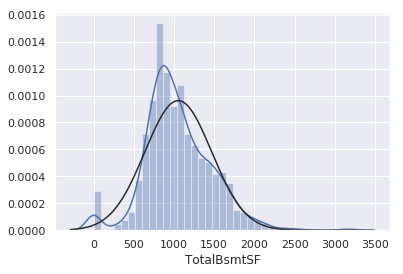

In [0]:
#histogram and normal probability plot
sns.distplot(house_price['TotalBsmtSF'],fit=norm);

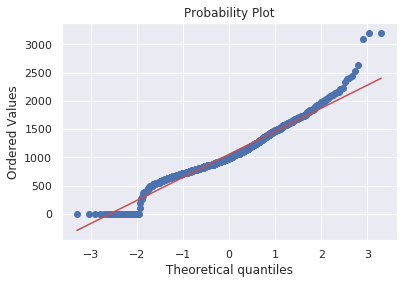

In [0]:
fig=plt.figure()
res = stats.probplot(house_price['TotalBsmtSF'],plot=plt)

In [0]:
#create column of new variables(one is enough because it's binary categorical feature)
#if area>0 it gets 1, for area==0 it gets 0
house_price['HasBsmt']= pd.Series(len(house_price['TotalBsmtSF']),index=house_price.index)
house_price['HasBsmt'] = 0
house_price.loc[house_price['TotalBsmtSF']>0,'HasBsmt']=1

In [0]:
#transforming data
house_price.loc[house_price['HasBsmt']==1,'TotalBsmtSF']= np.log(house_price['TotalBsmtSF'])



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


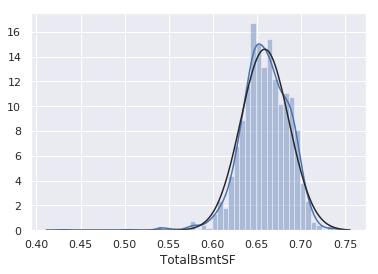

In [0]:
sns.distplot(house_price[house_price['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);

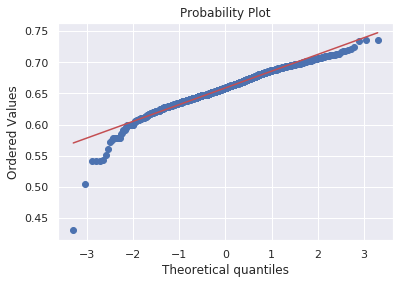

In [0]:
res = stats.probplot(house_price[house_price['TotalBsmtSF']>0]['TotalBsmtSF'],plot=plt)

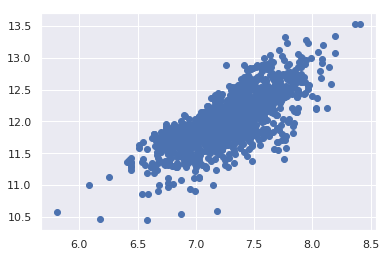

In [0]:
plt.scatter(house_price['GrLivArea'],house_price['SalePrice']);

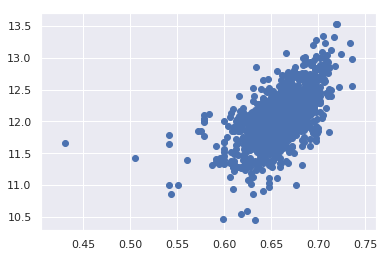

In [0]:
plt.scatter(house_price[house_price['TotalBsmtSF']>0]['TotalBsmtSF'],house_price[house_price['TotalBsmtSF']>0]['SalePrice'])